In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path='./data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y=np.log1p(df_train['SalePrice'])
df=df_train.drop(['Id','SalePrice'],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
num_features=[]
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype=='float64' or dtype=='int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features:{num_features}\n')


36 Numeric Features:['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [5]:
df=df[num_features]
df=df.fillna(-1)
MMEncoder=MinMaxScaler()
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


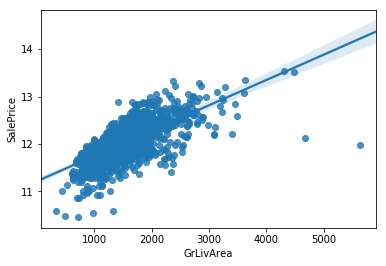

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8466431267473407

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['GrLivArea'],y=train_Y)
plt.show()

train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()

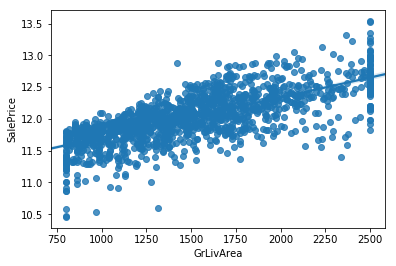

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8590286613713278

In [9]:
df['GrLivArea']=df['GrLivArea'].clip(800,2500)
sns.regplot(x=df['GrLivArea'],y=train_Y)
plt.show()

train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()

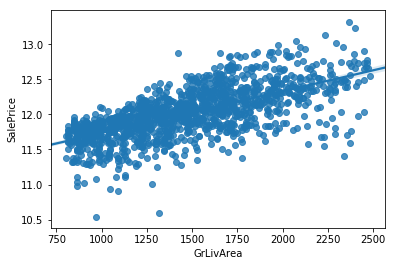

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8765700255857528

In [11]:
keep_indexs=(df['GrLivArea']>800)&(df['GrLivArea']<2500)
df=df[keep_indexs]
train_Y=train_Y[keep_indexs]
sns.regplot(x=df['GrLivArea'],y=train_Y)
plt.show()

train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()

In [18]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [27]:
df['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
5        796
6       1694
7       1107
8       1022
9       1077
10      1040
11      1182
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      1158
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
30       649
        ... 
1428     804
1429    1440
1430     734
1431     958
1432     968
1433     962
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1040
1441     848
1442    1026
1443     952
1444    1422
1445     913
1446    1188
1447    1220
1448     796
1450     896
1451    1578
1452    1072
1453    1140
1454    1221
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1344, dtype: int64

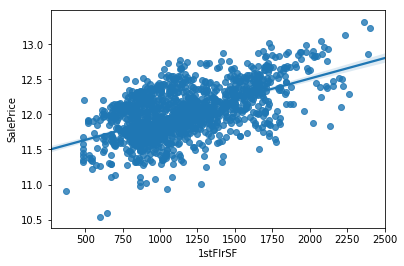

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8765700255857528

In [28]:
sns.regplot(x=df['1stFlrSF'],y=train_Y)
plt.show()

train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()

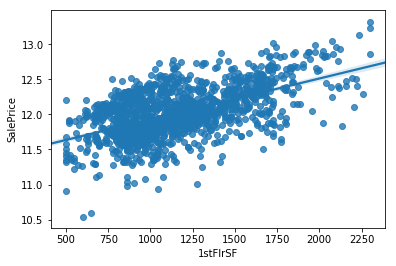

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8781978300912094

In [31]:
#Day10-1 Homework
df['1stFlrSF']=df['1stFlrSF'].clip(200,2300)
sns.regplot(x=df['1stFlrSF'],y=train_Y)
plt.show()

train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()

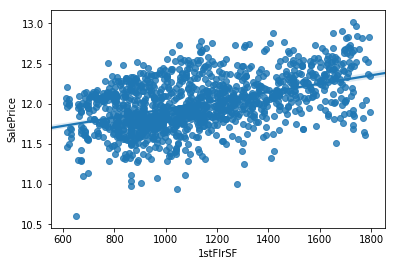

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8610857944781365

In [41]:
#Day10-2
keep_indexs=(df['1stFlrSF']>600)&(df['1stFlrSF']<1800)
df=df[keep_indexs]
train_Y=train_Y[keep_indexs]
sns.regplot(x=df['1stFlrSF'],y=train_Y)
plt.show()

train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()